In [1]:
img_path = "C:\\tmp\\1005ca47e516495512da0dbf3c68e847"

In [2]:
import torchvision.models as models
import os
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
import pickle
%matplotlib inline

In [3]:
model = models.resnet18(pretrained=True)

In [4]:
img_list = []
az_list = [60 * i for i in range(6)]
el_list = [-15, 0, 15, 30]
car = "1005ca47e516495512da0dbf3c68e847"
if True:
    for az in az_list:
        for el in el_list:
            img_list.append(os.path.join(img_path, "{}_az_{}_el_{}_albedo.png0001.png".format(car, str(az), str(el))))

In [5]:
outputs = []
def hook(module, input, output):
    print("!")
    outputs.append(output.detach().numpy())

model.layer4[-1].register_forward_hook(hook)

error = np.zeros(shape=256)

img_idx = 0
for img in img_list:
    print("new image...")
    im = Image.open(img).convert("RGB")
    img = transforms.ToTensor()(im.convert("RGB")).unsqueeze(0)
    im = np.array(im).reshape([-1, 3])
    color_unq, indices = np.unique(im, axis=0, return_inverse=True)
    for noise in range(1, 256, 5):
        print("noise level:", noise)
        feat_gt = model(img.float())
        for i in range(1, 9):
            
            im_new = Image.fromarray(np.uint8(im_new))
            img = transforms.ToTensor()(im_new.convert("RGB")).unsqueeze(0)
            feat = model(img.float())
            diff = np.linalg.norm(outputs[i] - outputs[0]) / (512. * 8 * 8)
            print("new difference in feature map:", diff)
            error[noise] += diff
        outputs.clear()
        print("new error value for ", noise, " is: ", error[noise])
            
    '''
    for noise in range(1, 256, 5):
        print(img_idx, " ", noise)
        feat_gt = model(img.float())
        for i in range(1, 9):
            im_tmp = im + (np.random.rand(256, 256, 3) - 0.5) * noise
            im_tmp[im_tmp < 0] = 0
            im_tmp[im_tmp > 255] = 255
            img = Image.fromarray(np.uint8(im_tmp))
            img = transforms.ToTensor()(img.convert("RGB")).unsqueeze(0)
            feat = model(img.float())
            diff = outputs[i] - outputs[0]
            error[noise] += np.linalg.norm(diff) /(512. * 8 * 8)
            #print(len(outputs))
        outputs.clear()
    img_idx += 1
            #print(error)
    '''
    #break

new image...
noise level: 1
!
!
new difference in feature map: 0.00031055681756697595
!
new difference in feature map: 0.00026384767261333764
!
new difference in feature map: 0.000212563099921681
!
new difference in feature map: 0.0002799642679747194
!
new difference in feature map: 0.00023562680871691555
!
new difference in feature map: 0.0002533305960241705
!
new difference in feature map: 0.0002856074715964496
!
new difference in feature map: 0.0003046891652047634
new error value for  1  is:  0.002146185899619013
noise level: 6
!
!
new difference in feature map: 0.001048467354848981
!
new difference in feature map: 0.0007763155153952539
!
new difference in feature map: 0.001125034992583096
!
new difference in feature map: 0.001430032541975379
!
new difference in feature map: 0.0010813067201524973
!
new difference in feature map: 0.0010043691145256162
!
new difference in feature map: 0.0009651414584368467
!
new difference in feature map: 0.0006998692988418043
new error value for  6  

new difference in feature map: 0.00541036669164896
!
new difference in feature map: 0.005981879774481058
!
new difference in feature map: 0.006127991247922182
!
new difference in feature map: 0.006188718602061272
!
new difference in feature map: 0.005837396252900362
!
new difference in feature map: 0.0058884406462311745
new error value for  81  is:  0.046738514211028814
noise level: 86
!
!
new difference in feature map: 0.005369751248508692
!
new difference in feature map: 0.004777495749294758
!
new difference in feature map: 0.005306393839418888
!
new difference in feature map: 0.00546297337859869
!
new difference in feature map: 0.005450166296213865
!
new difference in feature map: 0.005072793457657099
!
new difference in feature map: 0.0054204645566642284
!
new difference in feature map: 0.0053937253542244434
new error value for  86  is:  0.042253763880580664
noise level: 91
!
!
new difference in feature map: 0.005188125651329756
!
new difference in feature map: 0.005311188288033009

new difference in feature map: 0.00658020656555891
!
new difference in feature map: 0.005663833115249872
!
new difference in feature map: 0.0056987847201526165
!
new difference in feature map: 0.006184951867908239
new error value for  161  is:  0.04881573189049959
noise level: 166
!
!
new difference in feature map: 0.005643628537654877
!
new difference in feature map: 0.00602605240419507
!
new difference in feature map: 0.005968871526420116
!
new difference in feature map: 0.0060858395881950855
!
new difference in feature map: 0.006248911842703819
!
new difference in feature map: 0.006380936596542597
!
new difference in feature map: 0.0062172855250537395
!
new difference in feature map: 0.006192987784743309
new error value for  166  is:  0.048764513805508614
noise level: 171
!
!
new difference in feature map: 0.006604667752981186
!
new difference in feature map: 0.0068031116388738155
!
new difference in feature map: 0.006489878986030817
!
new difference in feature map: 0.00627938844263

new difference in feature map: 0.006581994704902172
!
new difference in feature map: 0.006833973340690136
new error value for  241  is:  0.0517311729490757
noise level: 246
!
!
new difference in feature map: 0.0065597849898040295
!
new difference in feature map: 0.0071626449935138226
!
new difference in feature map: 0.0068911039270460606
!
new difference in feature map: 0.006102892104536295
!
new difference in feature map: 0.007011037319898605
!
new difference in feature map: 0.00703431898728013
!
new difference in feature map: 0.006116789299994707
!
new difference in feature map: 0.006646375171840191
new error value for  246  is:  0.05352494679391384
noise level: 251
!
!
new difference in feature map: 0.006669908761978149
!
new difference in feature map: 0.006843809969723225
!
new difference in feature map: 0.0067164222709834576
!
new difference in feature map: 0.006109948735684156
!
new difference in feature map: 0.006512599531561136
!
new difference in feature map: 0.006634138524532

new error value for  66  is:  0.07593252323567867
noise level: 71
!
!
new difference in feature map: 0.004397301934659481
!
new difference in feature map: 0.003882270772010088
!
new difference in feature map: 0.004379224497824907
!
new difference in feature map: 0.004751960746943951
!
new difference in feature map: 0.004978221841156483
!
new difference in feature map: 0.004386664368212223
!
new difference in feature map: 0.004670369904488325
!
new difference in feature map: 0.003959287889301777
new error value for  71  is:  0.07599322497844696
noise level: 76
!
!
new difference in feature map: 0.0052400752902030945
!
new difference in feature map: 0.004234155640006065
!
new difference in feature map: 0.004032797645777464
!
new difference in feature map: 0.004737126640975475
!
new difference in feature map: 0.004951803479343653
!
new difference in feature map: 0.004563316702842712
!
new difference in feature map: 0.005248609464615583
!
new difference in feature map: 0.004087841603904962

!
new difference in feature map: 0.005729459226131439
!
new difference in feature map: 0.006162872537970543
!
new difference in feature map: 0.006228214129805565
!
new difference in feature map: 0.00565562816336751
!
new difference in feature map: 0.005958938505500555
!
new difference in feature map: 0.006996293552219868
new error value for  151  is:  0.09800832811743021
noise level: 156
!
!
new difference in feature map: 0.006443940103054047
!
new difference in feature map: 0.0063582975417375565
!
new difference in feature map: 0.0062720803543925285
!
new difference in feature map: 0.0062981355004012585
!
new difference in feature map: 0.0056993733160197735
!
new difference in feature map: 0.006429021246731281
!
new difference in feature map: 0.006045391783118248
!
new difference in feature map: 0.0065911500714719296
new error value for  156  is:  0.09771017404273152
noise level: 161
!
!
new difference in feature map: 0.005618629511445761
!
new difference in feature map: 0.00538185099

new difference in feature map: 0.005672527942806482
!
new difference in feature map: 0.007165959104895592
!
new difference in feature map: 0.006865233648568392
new error value for  231  is:  0.10590394400060177
noise level: 236
!
!
new difference in feature map: 0.0065178959630429745
!
new difference in feature map: 0.005882709752768278
!
new difference in feature map: 0.006157958414405584
!
new difference in feature map: 0.005990005563944578
!
new difference in feature map: 0.00714707188308239
!
new difference in feature map: 0.00623790267854929
!
new difference in feature map: 0.005973540246486664
!
new difference in feature map: 0.007072310894727707
new error value for  236  is:  0.10236702300608158
noise level: 241
!
!
new difference in feature map: 0.007112302351742983
!
new difference in feature map: 0.006345453672111034
!
new difference in feature map: 0.006503145210444927
!
new difference in feature map: 0.006524468772113323
!
new difference in feature map: 0.006743114441633224

new difference in feature map: 0.004039124120026827
new error value for  56  is:  0.10870540700852871
noise level: 61
!
!
new difference in feature map: 0.004920012317597866
!
new difference in feature map: 0.004248230252414942
!
new difference in feature map: 0.004855858627706766
!
new difference in feature map: 0.004989631474018097
!
new difference in feature map: 0.005249728448688984
!
new difference in feature map: 0.004851715639233589
!
new difference in feature map: 0.0045135351829230785
!
new difference in feature map: 0.00493871932849288
new error value for  61  is:  0.11052645370364189
noise level: 66
!
!
new difference in feature map: 0.0053678639233112335
!
new difference in feature map: 0.004741333425045013
!
new difference in feature map: 0.0050273253582417965
!
new difference in feature map: 0.004337082616984844
!
new difference in feature map: 0.005381385330110788
!
new difference in feature map: 0.005164723843336105
!
new difference in feature map: 0.005364737473428249


new difference in feature map: 0.006485307589173317
!
new difference in feature map: 0.006473112851381302
!
new difference in feature map: 0.006270691752433777
!
new difference in feature map: 0.0052331797778606415
!
new difference in feature map: 0.006777334026992321
!
new difference in feature map: 0.006419885903596878
!
new difference in feature map: 0.006630004849284887
new error value for  141  is:  0.14834059309214354
noise level: 146
!
!
new difference in feature map: 0.006217398215085268
!
new difference in feature map: 0.006541731301695108
!
new difference in feature map: 0.006121211219578981
!
new difference in feature map: 0.006206785328686237
!
new difference in feature map: 0.005480971187353134
!
new difference in feature map: 0.005807793699204922
!
new difference in feature map: 0.006179500371217728
!
new difference in feature map: 0.006221932824701071
new error value for  146  is:  0.1446343814022839
noise level: 151
!
!
new difference in feature map: 0.00679876981303095

new difference in feature map: 0.007252036593854427
!
new difference in feature map: 0.007136402651667595
!
new difference in feature map: 0.0067316098138689995
!
new difference in feature map: 0.00662160012871027
new error value for  221  is:  0.161441910546273
noise level: 226
!
!
new difference in feature map: 0.00716950511559844
!
new difference in feature map: 0.006845266092568636
!
new difference in feature map: 0.007106655277311802
!
new difference in feature map: 0.007057886570692062
!
new difference in feature map: 0.0070154620334506035
!
new difference in feature map: 0.0067886668257415295
!
new difference in feature map: 0.007398210931569338
!
new difference in feature map: 0.006539248861372471
new error value for  226  is:  0.16023491509258747
noise level: 231
!
!
new difference in feature map: 0.006971606984734535
!
new difference in feature map: 0.006614910438656807
!
new difference in feature map: 0.0068139974027872086
!
new difference in feature map: 0.00686443597078323

new difference in feature map: 0.0038252940867096186
!
new difference in feature map: 0.004108122084289789
new error value for  46  is:  0.12311901152133942
noise level: 51
!
!
new difference in feature map: 0.0038618482649326324
!
new difference in feature map: 0.0036996747367084026
!
new difference in feature map: 0.003778856946155429
!
new difference in feature map: 0.0038806681986898184
!
new difference in feature map: 0.003917614463716745
!
new difference in feature map: 0.004202459007501602
!
new difference in feature map: 0.004132276400923729
!
new difference in feature map: 0.004086633678525686
new error value for  51  is:  0.13658646773546934
noise level: 56
!
!
new difference in feature map: 0.004102972336113453
!
new difference in feature map: 0.004237715620547533
!
new difference in feature map: 0.004198919981718063
!
new difference in feature map: 0.004292255733162165
!
new difference in feature map: 0.004192064516246319
!
new difference in feature map: 0.00441113905981183

!
new difference in feature map: 0.005466224625706673
!
new difference in feature map: 0.0060196006670594215
!
new difference in feature map: 0.00574233615770936
!
new difference in feature map: 0.005914284382015467
!
new difference in feature map: 0.0062369005754590034
!
new difference in feature map: 0.0056410860270261765
!
new difference in feature map: 0.005610139109194279
!
new difference in feature map: 0.005345954094082117
new error value for  131  is:  0.18929210118949413
noise level: 136
!
!
new difference in feature map: 0.00595857435837388
!
new difference in feature map: 0.006057570688426495
!
new difference in feature map: 0.006292251870036125
!
new difference in feature map: 0.00652794074267149
!
new difference in feature map: 0.005963881965726614
!
new difference in feature map: 0.005912120454013348
!
new difference in feature map: 0.006100402679294348
!
new difference in feature map: 0.006023298483341932
new error value for  136  is:  0.189576402772218
noise level: 141


new difference in feature map: 0.006770031992346048
!
new difference in feature map: 0.006899709347635508
!
new difference in feature map: 0.00642530620098114
!
new difference in feature map: 0.00673076044768095
!
new difference in feature map: 0.006514614447951317
new error value for  211  is:  0.20874991593882442
noise level: 216
!
!
new difference in feature map: 0.006202975753694773
!
new difference in feature map: 0.0063446867279708385
!
new difference in feature map: 0.006386595778167248
!
new difference in feature map: 0.006756045389920473
!
new difference in feature map: 0.0063793109729886055
!
new difference in feature map: 0.00633347500115633
!
new difference in feature map: 0.0065834373235702515
!
new difference in feature map: 0.006469195708632469
new error value for  216  is:  0.20877975272014737
noise level: 221
!
!
new difference in feature map: 0.006464213598519564
!
new difference in feature map: 0.006611119024455547
!
new difference in feature map: 0.00651836255565285

new difference in feature map: 0.003410148434340954
!
new difference in feature map: 0.003350971732288599
!
new difference in feature map: 0.0036012870259582996
new error value for  36  is:  0.1466075824573636
noise level: 41
!
!
new difference in feature map: 0.0037905729841440916
!
new difference in feature map: 0.003441750770434737
!
new difference in feature map: 0.0038720297161489725
!
new difference in feature map: 0.0031494300346821547
!
new difference in feature map: 0.0028348779305815697
!
new difference in feature map: 0.0031330143101513386
!
new difference in feature map: 0.003799015423282981
!
new difference in feature map: 0.0039595384150743484
new error value for  41  is:  0.1474102141801268
noise level: 46
!
!
new difference in feature map: 0.0038701023440808058
!
new difference in feature map: 0.0039025740697979927
!
new difference in feature map: 0.0037182786036282778
!
new difference in feature map: 0.004137594718486071
!
new difference in feature map: 0.0036492287181

new error value for  116  is:  0.2291486943140626
noise level: 121
!
!
new difference in feature map: 0.005342778749763966
!
new difference in feature map: 0.005244559608399868
!
new difference in feature map: 0.004866970237344503
!
new difference in feature map: 0.005574751179665327
!
new difference in feature map: 0.005419797729700804
!
new difference in feature map: 0.00566183403134346
!
new difference in feature map: 0.00541458697989583
!
new difference in feature map: 0.004358758218586445
new error value for  121  is:  0.23485437221825123
noise level: 126
!
!
new difference in feature map: 0.005614598281681538
!
new difference in feature map: 0.005411270074546337
!
new difference in feature map: 0.005254554096609354
!
new difference in feature map: 0.0046218992210924625
!
new difference in feature map: 0.0049195243045687675
!
new difference in feature map: 0.0051701245829463005
!
new difference in feature map: 0.004984005820006132
!
new difference in feature map: 0.004705151543021

new difference in feature map: 0.005207915790379047
!
new difference in feature map: 0.005336655769497156
!
new difference in feature map: 0.006114082410931587
!
new difference in feature map: 0.00555327907204628
!
new difference in feature map: 0.0054977354593575
!
new difference in feature map: 0.006106225773692131
!
new difference in feature map: 0.006426922045648098
new error value for  201  is:  0.2518613548018038
noise level: 206
!
!
new difference in feature map: 0.006561473477631807
!
new difference in feature map: 0.006513603962957859
!
new difference in feature map: 0.006836738437414169
!
new difference in feature map: 0.006771709769964218
!
new difference in feature map: 0.006603896617889404
!
new difference in feature map: 0.006521061062812805
!
new difference in feature map: 0.006989017594605684
!
new difference in feature map: 0.007066592574119568
new error value for  206  is:  0.2615756946615875
noise level: 211
!
!
new difference in feature map: 0.006207021418958902
!
n

new difference in feature map: 0.0025116908363997936
!
new difference in feature map: 0.002331275725737214
!
new difference in feature map: 0.002316732658073306
!
new difference in feature map: 0.0022199684754014015
!
new difference in feature map: 0.0019579329527914524
new error value for  26  is:  0.14207835402339697
noise level: 31
!
!
new difference in feature map: 0.002759274560958147
!
new difference in feature map: 0.0032661976292729378
!
new difference in feature map: 0.0029366598464548588
!
new difference in feature map: 0.002758386544883251
!
new difference in feature map: 0.002997583942487836
!
new difference in feature map: 0.0029082014225423336
!
new difference in feature map: 0.0023716536816209555
!
new difference in feature map: 0.0024506994523108006
new error value for  31  is:  0.16402850323356688
noise level: 36
!
!
new difference in feature map: 0.0027785939164459705
!
new difference in feature map: 0.0024633475113660097
!
new difference in feature map: 0.00214737374

new difference in feature map: 0.00538139883428812
!
new difference in feature map: 0.005437904503196478
new error value for  106  is:  0.26684196712449193
noise level: 111
!
!
new difference in feature map: 0.004839238710701466
!
new difference in feature map: 0.004869718570262194
!
new difference in feature map: 0.005010784603655338
!
new difference in feature map: 0.004617102909833193
!
new difference in feature map: 0.00548262894153595
!
new difference in feature map: 0.005377382040023804
!
new difference in feature map: 0.005220293067395687
!
new difference in feature map: 0.004637581296265125
new error value for  111  is:  0.2657801932655275
noise level: 116
!
!
new difference in feature map: 0.004390292800962925
!
new difference in feature map: 0.005500266794115305
!
new difference in feature map: 0.005067202728241682
!
new difference in feature map: 0.004816856700927019
!
new difference in feature map: 0.004935178905725479
!
new difference in feature map: 0.005359806586056948
!

noise level: 191
!
!
new difference in feature map: 0.00581911439076066
!
new difference in feature map: 0.006265606731176376
!
new difference in feature map: 0.006509277503937483
!
new difference in feature map: 0.0058732423931360245
!
new difference in feature map: 0.005209468305110931
!
new difference in feature map: 0.005436093546450138
!
new difference in feature map: 0.005975371692329645
!
new difference in feature map: 0.005073654931038618
new error value for  191  is:  0.30282073421403766
noise level: 196
!
!
new difference in feature map: 0.0052610826678574085
!
new difference in feature map: 0.005930401850491762
!
new difference in feature map: 0.006060571875423193
!
new difference in feature map: 0.005441267974674702
!
new difference in feature map: 0.005917422007769346
!
new difference in feature map: 0.005593020003288984
!
new difference in feature map: 0.0052538043819367886
!
new difference in feature map: 0.005713519640266895
new error value for  196  is:  0.304159767460

new difference in feature map: 0.00117160240188241
!
new difference in feature map: 0.0015942847821861506
!
new difference in feature map: 0.0013777327258139849
!
new difference in feature map: 0.0017208956414833665
!
new difference in feature map: 0.001257498050108552
!
new difference in feature map: 0.0014084265567362309
new error value for  16  is:  0.11328531836625189
noise level: 21
!
!
new difference in feature map: 0.001745677087455988
!
new difference in feature map: 0.0017185159958899021
!
new difference in feature map: 0.00215989351272583
!
new difference in feature map: 0.0017460196977481246
!
new difference in feature map: 0.0016493394505232573
!
new difference in feature map: 0.00195665773935616
!
new difference in feature map: 0.0023437433410435915
!
new difference in feature map: 0.0019274497171863914
new error value for  21  is:  0.13680908095557243
noise level: 26
!
!
new difference in feature map: 0.00241867545992136
!
new difference in feature map: 0.0020238023716956

new difference in feature map: 0.004511069040745497
!
new difference in feature map: 0.004342735279351473
!
new difference in feature map: 0.004133111797273159
!
new difference in feature map: 0.004370247479528189
new error value for  96  is:  0.28493435913696885
noise level: 101
!
!
new difference in feature map: 0.004868157207965851
!
new difference in feature map: 0.004958126228302717
!
new difference in feature map: 0.004771358799189329
!
new difference in feature map: 0.005041775293648243
!
new difference in feature map: 0.005087433848530054
!
new difference in feature map: 0.004756191745400429
!
new difference in feature map: 0.005131144542247057
!
new difference in feature map: 0.005109765566885471
new error value for  101  is:  0.29634570935741067
noise level: 106
!
!
new difference in feature map: 0.004719641990959644
!
new difference in feature map: 0.004752197302877903
!
new difference in feature map: 0.0051781972870230675
!
new difference in feature map: 0.00559882679954171

new difference in feature map: 0.005311671644449234
new error value for  176  is:  0.33901976235210896
noise level: 181
!
!
new difference in feature map: 0.006473195739090443
!
new difference in feature map: 0.005345623474568129
!
new difference in feature map: 0.005736969411373138
!
new difference in feature map: 0.006533612031489611
!
new difference in feature map: 0.005700432229787111
!
new difference in feature map: 0.0064328634180128574
!
new difference in feature map: 0.005844431929290295
!
new difference in feature map: 0.005835969932377338
new error value for  181  is:  0.3452883171848953
noise level: 186
!
!
new difference in feature map: 0.006172409281134605
!
new difference in feature map: 0.005386253818869591
!
new difference in feature map: 0.0059186965227127075
!
new difference in feature map: 0.005634695291519165
!
new difference in feature map: 0.005824609659612179
!
new difference in feature map: 0.0062086451798677444
!
new difference in feature map: 0.005359204951673

new difference in feature map: 0.000555979844648391
!
new difference in feature map: 0.0007353886612690985
!
new difference in feature map: 0.0008743218495510519
!
new difference in feature map: 0.0011928555322811007
!
new difference in feature map: 0.0011984743177890778
!
new difference in feature map: 0.0007544835098087788
!
new difference in feature map: 0.0009256203775294125
!
new difference in feature map: 0.0006729381857439876
new error value for  6  is:  0.04977340062032454
noise level: 11
!
!
new difference in feature map: 0.001628423691727221
!
new difference in feature map: 0.0013754147803410888
!
new difference in feature map: 0.001885723671875894
!
new difference in feature map: 0.001946105039678514
!
new difference in feature map: 0.0013682423159480095
!
new difference in feature map: 0.0012402830179780722
!
new difference in feature map: 0.00140802888199687
!
new difference in feature map: 0.0014191648224368691
new error value for  11  is:  0.0920813946868293
noise level:

new difference in feature map: 0.004860701505094767
!
new difference in feature map: 0.005048180930316448
!
new difference in feature map: 0.004703521728515625
!
new difference in feature map: 0.004615027457475662
!
new difference in feature map: 0.004874080419540405
new error value for  86  is:  0.3199596954509616
noise level: 91
!
!
new difference in feature map: 0.005309640429913998
!
new difference in feature map: 0.004861576482653618
!
new difference in feature map: 0.005266614258289337
!
new difference in feature map: 0.00496022030711174
!
new difference in feature map: 0.005374839995056391
!
new difference in feature map: 0.004632983822375536
!
new difference in feature map: 0.005593863315880299
!
new difference in feature map: 0.004975579213351011
new error value for  91  is:  0.32420659670606256
noise level: 96
!
!
new difference in feature map: 0.00511443754658103
!
new difference in feature map: 0.005692133679986
!
new difference in feature map: 0.004967706277966499
!
new di

new difference in feature map: 0.005147560965269804
!
new difference in feature map: 0.005649529863148928
new error value for  166  is:  0.38296051835641265
noise level: 171
!
!
new difference in feature map: 0.005634153727442026
!
new difference in feature map: 0.005667523480951786
!
new difference in feature map: 0.006015588995069265
!
new difference in feature map: 0.006008222699165344
!
new difference in feature map: 0.005338727030903101
!
new difference in feature map: 0.006207599770277739
!
new difference in feature map: 0.006600093096494675
!
new difference in feature map: 0.005887825973331928
new error value for  171  is:  0.38536667078733444
noise level: 176
!
!
new difference in feature map: 0.00615885341539979
!
new difference in feature map: 0.006474453490227461
!
new difference in feature map: 0.006007332354784012
!
new difference in feature map: 0.00643175607547164
!
new difference in feature map: 0.006567917298525572
!
new difference in feature map: 0.005361341405659914


!
!
new difference in feature map: 0.007088851649314165
!
new difference in feature map: 0.006215553265064955
!
new difference in feature map: 0.006752145476639271
!
new difference in feature map: 0.006401930470019579
!
new difference in feature map: 0.006439725868403912
!
new difference in feature map: 0.006172231864184141
!
new difference in feature map: 0.006374305114150047
!
new difference in feature map: 0.005866371560841799
new error value for  251  is:  0.42057651234790683
new image...
noise level: 1
!
!
new difference in feature map: 0.00030453241197392344
!
new difference in feature map: 0.0003389283665455878
!
new difference in feature map: 0.0003583182115107775
!
new difference in feature map: 0.00036823967820964754
!
new difference in feature map: 0.0005286886007525027
!
new difference in feature map: 0.00031871299142949283
!
new difference in feature map: 0.0001875041052699089
!
new difference in feature map: 0.00028453703271225095
new error value for  1  is:  0.0175525603

new difference in feature map: 0.004916480742394924
!
new difference in feature map: 0.0046454002149403095
!
new difference in feature map: 0.004736566916108131
!
new difference in feature map: 0.005234262906014919
!
new difference in feature map: 0.004948175046592951
!
new difference in feature map: 0.0047477721236646175
new error value for  76  is:  0.3444826842751354
noise level: 81
!
!
new difference in feature map: 0.0036796622443944216
!
new difference in feature map: 0.004938483238220215
!
new difference in feature map: 0.0040319147519767284
!
new difference in feature map: 0.004506553057581186
!
new difference in feature map: 0.004341122694313526
!
new difference in feature map: 0.004893602803349495
!
new difference in feature map: 0.004926134366542101
!
new difference in feature map: 0.0039082677103579044
new error value for  81  is:  0.35591441253200173
noise level: 86
!
!
new difference in feature map: 0.005159931257367134
!
new difference in feature map: 0.00517734792083501

new difference in feature map: 0.006098624784499407
!
new difference in feature map: 0.005794338416308165
!
new difference in feature map: 0.005494405049830675
new error value for  156  is:  0.43286025105044246
noise level: 161
!
!
new difference in feature map: 0.006705386098474264
!
new difference in feature map: 0.006351296324282885
!
new difference in feature map: 0.005786870140582323
!
new difference in feature map: 0.005923629272729158
!
new difference in feature map: 0.005737834144383669
!
new difference in feature map: 0.0053673540242016315
!
new difference in feature map: 0.005506514105945826
!
new difference in feature map: 0.006093238480389118
new error value for  161  is:  0.42539377929642797
noise level: 166
!
!
new difference in feature map: 0.005357186309993267
!
new difference in feature map: 0.005742278415709734
!
new difference in feature map: 0.0058413222432136536
!
new difference in feature map: 0.005722318775951862
!
new difference in feature map: 0.006181625183671

new error value for  236  is:  0.4640860604122281
noise level: 241
!
!
new difference in feature map: 0.006777072325348854
!
new difference in feature map: 0.006747049745172262
!
new difference in feature map: 0.006107627879828215
!
new difference in feature map: 0.005327568855136633
!
new difference in feature map: 0.007090514060109854
!
new difference in feature map: 0.006844034884124994
!
new difference in feature map: 0.006625427398830652
!
new difference in feature map: 0.007036030292510986
new error value for  241  is:  0.46753143472597003
noise level: 246
!
!
new difference in feature map: 0.006217732094228268
!
new difference in feature map: 0.006095779128372669
!
new difference in feature map: 0.005879001226276159
!
new difference in feature map: 0.005355367437005043
!
new difference in feature map: 0.006074490491300821
!
new difference in feature map: 0.006677065510302782
!
new difference in feature map: 0.00598176708444953
!
new difference in feature map: 0.00617401022464036

!
new difference in feature map: 0.0042211986146867275
!
new difference in feature map: 0.004507582169026136
!
new difference in feature map: 0.004143505357205868
!
new difference in feature map: 0.004458657931536436
!
new difference in feature map: 0.003911391366273165
!
new difference in feature map: 0.004132912959903479
!
new difference in feature map: 0.003572749672457576
new error value for  66  is:  0.3605792981106788
noise level: 71
!
!
new difference in feature map: 0.003801762592047453
!
new difference in feature map: 0.0040800124406814575
!
new difference in feature map: 0.003980834968388081
!
new difference in feature map: 0.004224403761327267
!
new difference in feature map: 0.0035334050189703703
!
new difference in feature map: 0.003691560123115778
!
new difference in feature map: 0.003943817224353552
!
new difference in feature map: 0.004218419548124075
new error value for  71  is:  0.3593019377440214
noise level: 76
!
!
new difference in feature map: 0.004404442850500345

new difference in feature map: 0.0057912846095860004
!
new difference in feature map: 0.0053930641151964664
!
new difference in feature map: 0.00589453661814332
!
new difference in feature map: 0.005371312145143747
new error value for  146  is:  0.4616104499436915
noise level: 151
!
!
new difference in feature map: 0.005808788351714611
!
new difference in feature map: 0.004788851831108332
!
new difference in feature map: 0.006131334695965052
!
new difference in feature map: 0.005192311946302652
!
new difference in feature map: 0.005105508957058191
!
new difference in feature map: 0.005807764828205109
!
new difference in feature map: 0.005746860988438129
!
new difference in feature map: 0.005013488698750734
new error value for  151  is:  0.474513225723058
noise level: 156
!
!
new difference in feature map: 0.004966029431670904
!
new difference in feature map: 0.00550104770809412
!
new difference in feature map: 0.006023261230438948
!
new difference in feature map: 0.00548244034871459
!


new difference in feature map: 0.005810454022139311
new error value for  226  is:  0.5134124220348895
noise level: 231
!
!
new difference in feature map: 0.005364655051380396
!
new difference in feature map: 0.006539972499012947
!
new difference in feature map: 0.006176624447107315
!
new difference in feature map: 0.006422474980354309
!
new difference in feature map: 0.006341900210827589
!
new difference in feature map: 0.006469351705163717
!
new difference in feature map: 0.006070880685001612
!
new difference in feature map: 0.006014215759932995
new error value for  231  is:  0.5224569756537676
noise level: 236
!
!
new difference in feature map: 0.005826241802424192
!
new difference in feature map: 0.005970316473394632
!
new difference in feature map: 0.0062408363446593285
!
new difference in feature map: 0.005975254811346531
!
new difference in feature map: 0.0064456528052687645
!
new difference in feature map: 0.006045594345778227
!
new difference in feature map: 0.00623085768893361

noise level: 56
!
!
new difference in feature map: 0.003494715318083763
!
new difference in feature map: 0.003561405697837472
!
new difference in feature map: 0.003912665881216526
!
new difference in feature map: 0.0033709160052239895
!
new difference in feature map: 0.003328080056235194
!
new difference in feature map: 0.0030710012651979923
!
new difference in feature map: 0.003582544857636094
!
new difference in feature map: 0.003630098421126604
new error value for  56  is:  0.3563184153754264
noise level: 61
!
!
new difference in feature map: 0.0031515704467892647
!
new difference in feature map: 0.00354896136559546
!
new difference in feature map: 0.003172246040776372
!
new difference in feature map: 0.003378985682502389
!
new difference in feature map: 0.00376464007422328
!
new difference in feature map: 0.003827519016340375
!
new difference in feature map: 0.003807230619713664
!
new difference in feature map: 0.004095755517482758
new error value for  61  is:  0.37415222567506135


new difference in feature map: 0.00487386342138052
!
new difference in feature map: 0.005227144807577133
!
new difference in feature map: 0.005136086139827967
!
new difference in feature map: 0.005293802823871374
!
new difference in feature map: 0.004871161188930273
!
new difference in feature map: 0.005456134211272001
new error value for  136  is:  0.49232330126687884
noise level: 141
!
!
new difference in feature map: 0.004840487148612738
!
new difference in feature map: 0.005569771397858858
!
new difference in feature map: 0.004821691196411848
!
new difference in feature map: 0.00509881554171443
!
new difference in feature map: 0.0057274047285318375
!
new difference in feature map: 0.005429326090961695
!
new difference in feature map: 0.006100469268858433
!
new difference in feature map: 0.00551395071670413
new error value for  141  is:  0.5029187188483775
noise level: 146
!
!
new difference in feature map: 0.005617071874439716
!
new difference in feature map: 0.005114406812936068
!

new difference in feature map: 0.005620770156383514
!
new difference in feature map: 0.005558312404900789
!
new difference in feature map: 0.005102138966321945
new error value for  216  is:  0.5527582271024585
noise level: 221
!
!
new difference in feature map: 0.006010652054101229
!
new difference in feature map: 0.006561528891324997
!
new difference in feature map: 0.0052686408162117004
!
new difference in feature map: 0.004993312992155552
!
new difference in feature map: 0.0057212477549910545
!
new difference in feature map: 0.006155088078230619
!
new difference in feature map: 0.0061155520379543304
!
new difference in feature map: 0.005484350956976414
new error value for  221  is:  0.5592864700593054
noise level: 226
!
!
new difference in feature map: 0.005638378672301769
!
new difference in feature map: 0.0070394231006503105
!
new difference in feature map: 0.005494518205523491
!
new difference in feature map: 0.006053985562175512
!
new difference in feature map: 0.006590857636183

new difference in feature map: 0.003461129032075405
new error value for  41  is:  0.33195087569765747
noise level: 46
!
!
new difference in feature map: 0.00392893748357892
!
new difference in feature map: 0.0038845816161483526
!
new difference in feature map: 0.004123508930206299
!
new difference in feature map: 0.0039049044717103243
!
new difference in feature map: 0.00391804613173008
!
new difference in feature map: 0.0032352011185139418
!
new difference in feature map: 0.0030602654442191124
!
new difference in feature map: 0.003457701997831464
new error value for  46  is:  0.3536236162763089
noise level: 51
!
!
new difference in feature map: 0.004339250270277262
!
new difference in feature map: 0.0040016574785113335
!
new difference in feature map: 0.003738740924745798
!
new difference in feature map: 0.004040000028908253
!
new difference in feature map: 0.0038714029360562563
!
new difference in feature map: 0.0037075928412377834
!
new difference in feature map: 0.00381629471667110

!
new difference in feature map: 0.005706541705876589
!
new difference in feature map: 0.005566521547734737
!
new difference in feature map: 0.005264690611511469
!
new difference in feature map: 0.005170254036784172
!
new difference in feature map: 0.005738293286412954
!
new difference in feature map: 0.005032844841480255
!
new difference in feature map: 0.005386771634221077
new error value for  126  is:  0.5276678055524826
noise level: 131
!
!
new difference in feature map: 0.00516133988276124
!
new difference in feature map: 0.005523554049432278
!
new difference in feature map: 0.0052184914238750935
!
new difference in feature map: 0.00570014538243413
!
new difference in feature map: 0.005111588165163994
!
new difference in feature map: 0.005728107877075672
!
new difference in feature map: 0.005172465927898884
!
new difference in feature map: 0.005387174431234598
new error value for  131  is:  0.5302429860457778
noise level: 136
!
!
new difference in feature map: 0.005354502703994512

new difference in feature map: 0.006239000242203474
!
new difference in feature map: 0.005756435915827751
!
new difference in feature map: 0.00646852795034647
!
new difference in feature map: 0.006615686696022749
new error value for  206  is:  0.6038625673390925
noise level: 211
!
!
new difference in feature map: 0.006077264901250601
!
new difference in feature map: 0.006405401509255171
!
new difference in feature map: 0.006671334151178598
!
new difference in feature map: 0.006808907259255648
!
new difference in feature map: 0.005249164067208767
!
new difference in feature map: 0.006551346275955439
!
new difference in feature map: 0.006005977280437946
!
new difference in feature map: 0.005674049723893404
new error value for  211  is:  0.6004532626830041
noise level: 216
!
!
new difference in feature map: 0.005498803686350584
!
new difference in feature map: 0.005518855061382055
!
new difference in feature map: 0.005708510056138039
!
new difference in feature map: 0.006759715732187033
!

new difference in feature map: 0.003487237263470888
!
new difference in feature map: 0.003015252761542797
new error value for  31  is:  0.328836154891178
noise level: 36
!
!
new difference in feature map: 0.00364310503937304
!
new difference in feature map: 0.0036737890914082527
!
new difference in feature map: 0.0038692376110702753
!
new difference in feature map: 0.004042003769427538
!
new difference in feature map: 0.004252296872437
!
new difference in feature map: 0.0037108033429831266
!
new difference in feature map: 0.003057215828448534
!
new difference in feature map: 0.002797046909108758
new error value for  36  is:  0.347530918661505
noise level: 41
!
!
new difference in feature map: 0.004116253461688757
!
new difference in feature map: 0.0035360793117433786
!
new difference in feature map: 0.0036722628865391016
!
new difference in feature map: 0.004661440849304199
!
new difference in feature map: 0.00408935546875
!
new difference in feature map: 0.0034903613850474358
!
new di

new difference in feature map: 0.005939650349318981
!
new difference in feature map: 0.005764079745858908
!
new difference in feature map: 0.006195595487952232
!
new difference in feature map: 0.005213521420955658
!
new difference in feature map: 0.0054510594345629215
!
new difference in feature map: 0.005651867017149925
!
new difference in feature map: 0.005942706484347582
!
new difference in feature map: 0.0060602459125220776
new error value for  116  is:  0.5610345993191004
noise level: 121
!
!
new difference in feature map: 0.005924151744693518
!
new difference in feature map: 0.006102181971073151
!
new difference in feature map: 0.0062092505395412445
!
new difference in feature map: 0.0063250805251300335
!
new difference in feature map: 0.005389312282204628
!
new difference in feature map: 0.0064051090739667416
!
new difference in feature map: 0.00618686992675066
!
new difference in feature map: 0.006103168241679668
new error value for  121  is:  0.5792310414835811
noise level: 12

new difference in feature map: 0.006634098012000322
!
new difference in feature map: 0.0067022801376879215
!
new difference in feature map: 0.0064487154595553875
!
new difference in feature map: 0.007079399656504393
!
new difference in feature map: 0.006773130036890507
new error value for  196  is:  0.6371593861840665
noise level: 201
!
!
new difference in feature map: 0.0068161035887897015
!
new difference in feature map: 0.0058157495222985744
!
new difference in feature map: 0.006976377218961716
!
new difference in feature map: 0.0063551790080964565
!
new difference in feature map: 0.006202672608196735
!
new difference in feature map: 0.006729971617460251
!
new difference in feature map: 0.006521032191812992
!
new difference in feature map: 0.005872879642993212
new error value for  201  is:  0.6410063495859504
noise level: 206
!
!
new difference in feature map: 0.00643136166036129
!
new difference in feature map: 0.00665266253054142
!
new difference in feature map: 0.0060124667361378

new difference in feature map: 0.0020345451775938272
!
new difference in feature map: 0.0021294152829796076
!
new difference in feature map: 0.0021847120951861143
new error value for  21  is:  0.26528418774250895
noise level: 26
!
!
new difference in feature map: 0.002628311049193144
!
new difference in feature map: 0.0029037045314908028
!
new difference in feature map: 0.002630828879773617
!
new difference in feature map: 0.0026917471550405025
!
new difference in feature map: 0.002565978094935417
!
new difference in feature map: 0.002727642422541976
!
new difference in feature map: 0.0024838168174028397
!
new difference in feature map: 0.0024785485584288836
new error value for  26  is:  0.31324186350684613
noise level: 31
!
!
new difference in feature map: 0.0031934925355017185
!
new difference in feature map: 0.003224434796720743
!
new difference in feature map: 0.002395250368863344
!
new difference in feature map: 0.003019213443621993
!
new difference in feature map: 0.0032571561168

new error value for  101  is:  0.5797652057372034
noise level: 106
!
!
new difference in feature map: 0.00536319799721241
!
new difference in feature map: 0.004571812693029642
!
new difference in feature map: 0.004369085654616356
!
new difference in feature map: 0.004907552152872086
!
new difference in feature map: 0.0053097945638000965
!
new difference in feature map: 0.004968587309122086
!
new difference in feature map: 0.004049190320074558
!
new difference in feature map: 0.005001279525458813
new error value for  106  is:  0.5905372276902199
noise level: 111
!
!
new difference in feature map: 0.00511208875104785
!
new difference in feature map: 0.0048330980353057384
!
new difference in feature map: 0.0048965709283947945
!
new difference in feature map: 0.0053184982389211655
!
new difference in feature map: 0.004905391484498978
!
new difference in feature map: 0.005132897756993771
!
new difference in feature map: 0.005484399385750294
!
new difference in feature map: 0.004689914640039

new difference in feature map: 0.0059521738439798355
!
new difference in feature map: 0.006282046437263489
!
new difference in feature map: 0.005605769343674183
!
new difference in feature map: 0.006021022796630859
!
new difference in feature map: 0.005758106242865324
!
new difference in feature map: 0.005806302651762962
!
new difference in feature map: 0.005839748773723841
new error value for  186  is:  0.6752149844542146
noise level: 191
!
!
new difference in feature map: 0.0055411322973668575
!
new difference in feature map: 0.006343382876366377
!
new difference in feature map: 0.0067005581222474575
!
new difference in feature map: 0.006785474717617035
!
new difference in feature map: 0.006850529462099075
!
new difference in feature map: 0.0062410868704319
!
new difference in feature map: 0.005959898233413696
!
new difference in feature map: 0.0060080429539084435
new error value for  191  is:  0.6933352225460112
noise level: 196
!
!
new difference in feature map: 0.00558195030316710

new difference in feature map: 0.0012275055050849915
!
new difference in feature map: 0.0012120179599151015
!
new difference in feature map: 0.0012319631641730666
!
new difference in feature map: 0.001579437404870987
!
new difference in feature map: 0.0012456614058464766
new error value for  11  is:  0.1735405216459185
noise level: 16
!
!
new difference in feature map: 0.001981031149625778
!
new difference in feature map: 0.00200247997418046
!
new difference in feature map: 0.0017470212187618017
!
new difference in feature map: 0.002168284496292472
!
new difference in feature map: 0.0019181988900527358
!
new difference in feature map: 0.0017236658604815602
!
new difference in feature map: 0.0021692519076168537
!
new difference in feature map: 0.0017222687602043152
new error value for  16  is:  0.23326364590320736
noise level: 21
!
!
new difference in feature map: 0.0027365288697183132
!
new difference in feature map: 0.0022741120774298906
!
new difference in feature map: 0.002537593245

new difference in feature map: 0.005231016781181097
!
new difference in feature map: 0.005864115431904793
new error value for  91  is:  0.6001454410143197
noise level: 96
!
!
new difference in feature map: 0.006065035238862038
!
new difference in feature map: 0.0049874428659677505
!
new difference in feature map: 0.0059917219914495945
!
new difference in feature map: 0.005331539548933506
!
new difference in feature map: 0.00480665871873498
!
new difference in feature map: 0.005046190228313208
!
new difference in feature map: 0.006187255494296551
!
new difference in feature map: 0.0052515435963869095
new error value for  96  is:  0.5977461028378457
noise level: 101
!
!
new difference in feature map: 0.005063382908701897
!
new difference in feature map: 0.005419637076556683
!
new difference in feature map: 0.005773956887423992
!
new difference in feature map: 0.005250279791653156
!
new difference in feature map: 0.005248648580163717
!
new difference in feature map: 0.0053650736808776855


noise level: 176
!
!
new difference in feature map: 0.006475027650594711
!
new difference in feature map: 0.006400953978300095
!
new difference in feature map: 0.0063796257600188255
!
new difference in feature map: 0.00645849434658885
!
new difference in feature map: 0.006788079161196947
!
new difference in feature map: 0.006294508930295706
!
new difference in feature map: 0.006484027020633221
!
new difference in feature map: 0.005658808164298534
new error value for  176  is:  0.7355558848939836
noise level: 181
!
!
new difference in feature map: 0.006132034119218588
!
new difference in feature map: 0.007013400085270405
!
new difference in feature map: 0.005867495201528072
!
new difference in feature map: 0.006251886021345854
!
new difference in feature map: 0.005782317835837603
!
new difference in feature map: 0.006309853866696358
!
new difference in feature map: 0.006543249823153019
!
new difference in feature map: 0.006640140898525715
new error value for  181  is:  0.729793401435017

new difference in feature map: 0.00021794937492813915
!
new difference in feature map: 0.0002056131197605282
!
new difference in feature map: 0.0002294112928211689
!
new difference in feature map: 0.00022239124518819153
!
new difference in feature map: 0.00021276775805745274
!
new difference in feature map: 0.00022667902521789074
new error value for  1  is:  0.030412951949983835
noise level: 6
!
!
new difference in feature map: 0.0007401932962238789
!
new difference in feature map: 0.0009285304695367813
!
new difference in feature map: 0.000908883404918015
!
new difference in feature map: 0.0007127526332624257
!
new difference in feature map: 0.0006941716419532895
!
new difference in feature map: 0.0005191356176510453
!
new difference in feature map: 0.0006569854449480772
!
new difference in feature map: 0.0008549743215553463
new error value for  6  is:  0.0948441952932626
noise level: 11
!
!
new difference in feature map: 0.001612016698345542
!
new difference in feature map: 0.0012727

!
new difference in feature map: 0.005430722143501043
!
new difference in feature map: 0.005071607884019613
!
new difference in feature map: 0.005135511979460716
new error value for  81  is:  0.6251508388668299
noise level: 86
!
!
new difference in feature map: 0.005403424613177776
!
new difference in feature map: 0.005760390777140856
!
new difference in feature map: 0.0051899561658501625
!
new difference in feature map: 0.005934193730354309
!
new difference in feature map: 0.00532839959487319
!
new difference in feature map: 0.00520067336037755
!
new difference in feature map: 0.004821243230253458
!
new difference in feature map: 0.004872423131018877
new error value for  86  is:  0.6369856693781912
noise level: 91
!
!
new difference in feature map: 0.005012247245758772
!
new difference in feature map: 0.005145314149558544
!
new difference in feature map: 0.005384789314121008
!
new difference in feature map: 0.004961693659424782
!
new difference in feature map: 0.0051950132474303246
!


new error value for  161  is:  0.7554709031246603
noise level: 166
!
!
new difference in feature map: 0.006236132699996233
!
new difference in feature map: 0.0064575462602078915
!
new difference in feature map: 0.005898922216147184
!
new difference in feature map: 0.006008938420563936
!
new difference in feature map: 0.005393865518271923
!
new difference in feature map: 0.006286296062171459
!
new difference in feature map: 0.006260314490646124
!
new difference in feature map: 0.005902432836592197
new error value for  166  is:  0.7626426946371794
noise level: 171
!
!
new difference in feature map: 0.006407963577657938
!
new difference in feature map: 0.0063867755234241486
!
new difference in feature map: 0.0063006761483848095
!
new difference in feature map: 0.006503617390990257
!
new difference in feature map: 0.0059354971162974834
!
new difference in feature map: 0.005767769180238247
!
new difference in feature map: 0.0063601830042898655
!
new difference in feature map: 0.006491554435

new difference in feature map: 0.006488496903330088
!
new difference in feature map: 0.006546253338456154
!
new difference in feature map: 0.007089043036103249
!
new difference in feature map: 0.006817564368247986
!
new difference in feature map: 0.006486683618277311
!
new difference in feature map: 0.007343450095504522
!
new difference in feature map: 0.007227617781609297
new error value for  246  is:  0.828625020571053
noise level: 251
!
!
new difference in feature map: 0.007006223313510418
!
new difference in feature map: 0.007159775588661432
!
new difference in feature map: 0.006803856231272221
!
new difference in feature map: 0.007391813676804304
!
new difference in feature map: 0.0072624413296580315
!
new difference in feature map: 0.007157366722822189
!
new difference in feature map: 0.00768080772832036
!
new difference in feature map: 0.00757910730317235
new error value for  251  is:  0.8426178828813136
new image...
noise level: 1
!
!
new difference in feature map: 0.0002170535

new difference in feature map: 0.005371705163270235
!
new difference in feature map: 0.004662785679101944
!
new difference in feature map: 0.004477316047996283
!
new difference in feature map: 0.00456329295411706
!
new difference in feature map: 0.005123264621943235
new error value for  71  is:  0.6194578188005835
noise level: 76
!
!
new difference in feature map: 0.004989133682101965
!
new difference in feature map: 0.005249721463769674
!
new difference in feature map: 0.004914849530905485
!
new difference in feature map: 0.004824450705200434
!
new difference in feature map: 0.005210472270846367
!
new difference in feature map: 0.0039028639439493418
!
new difference in feature map: 0.0046819355338811874
!
new difference in feature map: 0.00490737846121192
new error value for  76  is:  0.646820355206728
noise level: 81
!
!
new difference in feature map: 0.005242457613348961
!
new difference in feature map: 0.004762712400406599
!
new difference in feature map: 0.004099307116121054
!
new

new difference in feature map: 0.005528322421014309
!
new difference in feature map: 0.005681352224200964
new error value for  151  is:  0.8007837571203709
noise level: 156
!
!
new difference in feature map: 0.0057554226368665695
!
new difference in feature map: 0.006078606005758047
!
new difference in feature map: 0.006214743480086327
!
new difference in feature map: 0.005822148639708757
!
new difference in feature map: 0.005597429815679789
!
new difference in feature map: 0.005998073611408472
!
new difference in feature map: 0.0055884867906570435
!
new difference in feature map: 0.006008813623338938
new error value for  156  is:  0.8109736270271242
noise level: 161
!
!
new difference in feature map: 0.006504341959953308
!
new difference in feature map: 0.006322371307760477
!
new difference in feature map: 0.005598717834800482
!
new difference in feature map: 0.006460320670157671
!
new difference in feature map: 0.005419563036412001
!
new difference in feature map: 0.00611591432243585

!
!
new difference in feature map: 0.006749404594302177
!
new difference in feature map: 0.007343748584389687
!
new difference in feature map: 0.007238547783344984
!
new difference in feature map: 0.007489397190511227
!
new difference in feature map: 0.007231215480715036
!
new difference in feature map: 0.007628352846950293
!
new difference in feature map: 0.006961110047996044
!
new difference in feature map: 0.006896630860865116
new error value for  236  is:  0.880419491790235
noise level: 241
!
!
new difference in feature map: 0.006538194604218006
!
new difference in feature map: 0.006823122501373291
!
new difference in feature map: 0.006644625216722488
!
new difference in feature map: 0.006274411920458078
!
new difference in feature map: 0.007022384088486433
!
new difference in feature map: 0.006927696522325277
!
new difference in feature map: 0.007013964932411909
!
new difference in feature map: 0.00635623000562191
new error value for  241  is:  0.894053325522691
noise level: 246
!

new difference in feature map: 0.005024585872888565
!
new difference in feature map: 0.0040931557305157185
!
new difference in feature map: 0.003257542382925749
!
new difference in feature map: 0.004490781109780073
!
new difference in feature map: 0.004223995376378298
!
new difference in feature map: 0.004081872291862965
new error value for  61  is:  0.6190039501525462
noise level: 66
!
!
new difference in feature map: 0.004631932359188795
!
new difference in feature map: 0.004130141343921423
!
new difference in feature map: 0.004461629781872034
!
new difference in feature map: 0.00449804961681366
!
new difference in feature map: 0.004651560913771391
!
new difference in feature map: 0.0037642400711774826
!
new difference in feature map: 0.004312941338866949
!
new difference in feature map: 0.004471433814615011
new error value for  66  is:  0.6521530714817345
noise level: 71
!
!
new difference in feature map: 0.005109298042953014
!
new difference in feature map: 0.004768724553287029
!
n

new difference in feature map: 0.005729673895984888
!
new difference in feature map: 0.005371815990656614
!
new difference in feature map: 0.006322374567389488
new error value for  141  is:  0.8323002923280001
noise level: 146
!
!
new difference in feature map: 0.006176108960062265
!
new difference in feature map: 0.0064239902421832085
!
new difference in feature map: 0.006215675268322229
!
new difference in feature map: 0.005746984854340553
!
new difference in feature map: 0.006621659267693758
!
new difference in feature map: 0.005221027415245771
!
new difference in feature map: 0.005745922215282917
!
new difference in feature map: 0.006250413600355387
new error value for  146  is:  0.8349509299732745
noise level: 151
!
!
new difference in feature map: 0.006236829794943333
!
new difference in feature map: 0.006016246043145657
!
new difference in feature map: 0.005967431701719761
!
new difference in feature map: 0.0056547606363892555
!
new difference in feature map: 0.00591226806864142

new error value for  221  is:  0.925927868578583
noise level: 226
!
!
new difference in feature map: 0.006064753048121929
!
new difference in feature map: 0.006312625948339701
!
new difference in feature map: 0.006595636252313852
!
new difference in feature map: 0.0063136969693005085
!
new difference in feature map: 0.005760934203863144
!
new difference in feature map: 0.006370669696480036
!
new difference in feature map: 0.006736828945577145
!
new difference in feature map: 0.006358843296766281
new error value for  226  is:  0.9266506657004356
noise level: 231
!
!
new difference in feature map: 0.006519770715385675
!
new difference in feature map: 0.007016935385763645
!
new difference in feature map: 0.0065542589873075485
!
new difference in feature map: 0.006924662739038467
!
new difference in feature map: 0.006920995190739632
!
new difference in feature map: 0.00608521094545722
!
new difference in feature map: 0.00688335532322526
!
new difference in feature map: 0.00595975574105978


!
new difference in feature map: 0.003281031036749482
!
new difference in feature map: 0.003227787557989359
!
new difference in feature map: 0.0031151138246059418
!
new difference in feature map: 0.0028608168940991163
!
new difference in feature map: 0.003502921899780631
!
new difference in feature map: 0.0031843732576817274
!
new difference in feature map: 0.0032060062512755394
new error value for  51  is:  0.5976625285111368
noise level: 56
!
!
new difference in feature map: 0.0033319212961941957
!
new difference in feature map: 0.003908845596015453
!
new difference in feature map: 0.0031580673530697823
!
new difference in feature map: 0.0034105961676687002
!
new difference in feature map: 0.0036846224684268236
!
new difference in feature map: 0.003974153194576502
!
new difference in feature map: 0.0033955553080886602
!
new difference in feature map: 0.0035262638702988625
new error value for  56  is:  0.620013888925314
noise level: 61
!
!
new difference in feature map: 0.003672677790

new difference in feature map: 0.005346988327801228
!
new difference in feature map: 0.005231291987001896
!
new difference in feature map: 0.005582612939178944
!
new difference in feature map: 0.005445811431854963
new error value for  131  is:  0.8509343494661152
noise level: 136
!
!
new difference in feature map: 0.0054490831680595875
!
new difference in feature map: 0.005367566831409931
!
new difference in feature map: 0.0056979660876095295
!
new difference in feature map: 0.005501278676092625
!
new difference in feature map: 0.005625444930046797
!
new difference in feature map: 0.005141183268278837
!
new difference in feature map: 0.005581922363489866
!
new difference in feature map: 0.006350433919578791
new error value for  136  is:  0.863901452627033
noise level: 141
!
!
new difference in feature map: 0.00568790826946497
!
new difference in feature map: 0.005709180608391762
!
new difference in feature map: 0.0056129563599824905
!
new difference in feature map: 0.005487106740474701

new difference in feature map: 0.006549887824803591
new error value for  211  is:  0.9532056348398328
noise level: 216
!
!
new difference in feature map: 0.007051961030811071
!
new difference in feature map: 0.0066658309660851955
!
new difference in feature map: 0.006206314545124769
!
new difference in feature map: 0.005636397283524275
!
new difference in feature map: 0.0060995640233159065
!
new difference in feature map: 0.006422874052077532
!
new difference in feature map: 0.006357251200824976
!
new difference in feature map: 0.006213077809661627
new error value for  216  is:  0.9643385279923677
noise level: 221
!
!
new difference in feature map: 0.006369712296873331
!
new difference in feature map: 0.0063218302093446255
!
new difference in feature map: 0.006419165525585413
!
new difference in feature map: 0.0060046641156077385
!
new difference in feature map: 0.0059942943044006824
!
new difference in feature map: 0.005563180427998304
!
new difference in feature map: 0.00670224521309

noise level: 41
!
!
new difference in feature map: 0.0028808063361793756
!
new difference in feature map: 0.0029378391336649656
!
new difference in feature map: 0.002994393929839134
!
new difference in feature map: 0.0026730652898550034
!
new difference in feature map: 0.003360286122187972
!
new difference in feature map: 0.0027162861078977585
!
new difference in feature map: 0.0029663373716175556
!
new difference in feature map: 0.0030146462377160788
new error value for  41  is:  0.5528413499705493
noise level: 46
!
!
new difference in feature map: 0.0032184883020818233
!
new difference in feature map: 0.0030012077186256647
!
new difference in feature map: 0.003288586623966694
!
new difference in feature map: 0.003386393189430237
!
new difference in feature map: 0.0030259841587394476
!
new difference in feature map: 0.002837027423083782
!
new difference in feature map: 0.002900792984291911
!
new difference in feature map: 0.0036098603159189224
new error value for  46  is:  0.585810193

new difference in feature map: 0.0054349396377801895
!
new difference in feature map: 0.005233480129390955
!
new difference in feature map: 0.005473901983350515
!
new difference in feature map: 0.004854538943618536
!
new difference in feature map: 0.004623234272003174
!
new difference in feature map: 0.004704563412815332
new error value for  121  is:  0.8809544453397393
noise level: 126
!
!
new difference in feature map: 0.005923510529100895
!
new difference in feature map: 0.005289907567203045
!
new difference in feature map: 0.005210942588746548
!
new difference in feature map: 0.005149788223206997
!
new difference in feature map: 0.0055792671628296375
!
new difference in feature map: 0.005297227296978235
!
new difference in feature map: 0.004949948750436306
!
new difference in feature map: 0.0042750220745801926
new error value for  126  is:  0.8858640338294208
noise level: 131
!
!
new difference in feature map: 0.005016924813389778
!
new difference in feature map: 0.0053008901886641

new difference in feature map: 0.005563938524574041
!
new difference in feature map: 0.006342323496937752
!
new difference in feature map: 0.005575417075306177
new error value for  201  is:  0.9943624828010798
noise level: 206
!
!
new difference in feature map: 0.0060776518657803535
!
new difference in feature map: 0.005949948448687792
!
new difference in feature map: 0.0065309228375554085
!
new difference in feature map: 0.006540866568684578
!
new difference in feature map: 0.006357632577419281
!
new difference in feature map: 0.0060564251616597176
!
new difference in feature map: 0.006167949642986059
!
new difference in feature map: 0.005917549133300781
new error value for  206  is:  1.0136069892905653
noise level: 211
!
!
new difference in feature map: 0.005259344354271889
!
new difference in feature map: 0.006139312870800495
!
new difference in feature map: 0.0064798640087246895
!
new difference in feature map: 0.005685005336999893
!
new difference in feature map: 0.005906938109546

new difference in feature map: 0.0036912786308676004
new error value for  26  is:  0.4613277625758201
noise level: 31
!
!
new difference in feature map: 0.0034201403614133596
!
new difference in feature map: 0.002774439984932542
!
new difference in feature map: 0.0030144343618303537
!
new difference in feature map: 0.0025911247357726097
!
new difference in feature map: 0.0024597281590104103
!
new difference in feature map: 0.0028161623049527407
!
new difference in feature map: 0.00418782327324152
!
new difference in feature map: 0.0036701245699077845
new error value for  31  is:  0.5138393887318671
noise level: 36
!
!
new difference in feature map: 0.0035917884670197964
!
new difference in feature map: 0.0037283222191035748
!
new difference in feature map: 0.0029285792261362076
!
new difference in feature map: 0.003995917271822691
!
new difference in feature map: 0.0027622494380921125
!
new difference in feature map: 0.003374008694663644
!
new difference in feature map: 0.0031444055493

new difference in feature map: 0.005592645145952702
!
new difference in feature map: 0.0046563646756112576
!
new difference in feature map: 0.0049897669814527035
!
new difference in feature map: 0.005594166927039623
!
new difference in feature map: 0.006038532592356205
!
new difference in feature map: 0.005458321422338486
!
new difference in feature map: 0.005953577347099781
new error value for  111  is:  0.8984479098580778
noise level: 116
!
!
new difference in feature map: 0.005561782978475094
!
new difference in feature map: 0.004892325960099697
!
new difference in feature map: 0.005603811237961054
!
new difference in feature map: 0.0055481018498539925
!
new difference in feature map: 0.005613913759589195
!
new difference in feature map: 0.005309164524078369
!
new difference in feature map: 0.005398847162723541
!
new difference in feature map: 0.005566102918237448
new error value for  116  is:  0.9085181932896376
noise level: 121
!
!
new difference in feature map: 0.0056688771583139

new difference in feature map: 0.006302515044808388
!
new difference in feature map: 0.006302410736680031
!
new difference in feature map: 0.00450984388589859
!
new difference in feature map: 0.0060442532412707806
new error value for  191  is:  1.037237528245896
noise level: 196
!
!
new difference in feature map: 0.00657427916303277
!
new difference in feature map: 0.006142523605376482
!
new difference in feature map: 0.0057471925392746925
!
new difference in feature map: 0.006154507398605347
!
new difference in feature map: 0.005796194076538086
!
new difference in feature map: 0.006211506202816963
!
new difference in feature map: 0.0063110352493822575
!
new difference in feature map: 0.006734870839864016
new error value for  196  is:  1.038890934549272
noise level: 201
!
!
new difference in feature map: 0.006473655346781015
!
new difference in feature map: 0.006349263247102499
!
new difference in feature map: 0.0063884202390909195
!
new difference in feature map: 0.0051424941048026085

new difference in feature map: 0.0016991924494504929
!
new difference in feature map: 0.0017489755991846323
new error value for  16  is:  0.338821750250645
noise level: 21
!
!
new difference in feature map: 0.002060751663520932
!
new difference in feature map: 0.00182317104190588
!
new difference in feature map: 0.002347563160583377
!
new difference in feature map: 0.001888228696770966
!
new difference in feature map: 0.002058265032246709
!
new difference in feature map: 0.0016515451716259122
!
new difference in feature map: 0.0020325130317360163
!
new difference in feature map: 0.0014156269608065486
new error value for  21  is:  0.4093175345333293
noise level: 26
!
!
new difference in feature map: 0.0023733905982226133
!
new difference in feature map: 0.0024508784990757704
!
new difference in feature map: 0.0019221723778173327
!
new difference in feature map: 0.002619896549731493
!
new difference in feature map: 0.002216125838458538
!
new difference in feature map: 0.00183135119732469

!
new difference in feature map: 0.005243855062872171
!
new difference in feature map: 0.00458000460639596
!
new difference in feature map: 0.005082570482045412
!
new difference in feature map: 0.004929111804813147
!
new difference in feature map: 0.005737959872931242
!
new difference in feature map: 0.004915514029562473
!
new difference in feature map: 0.005357813090085983
!
new difference in feature map: 0.004657151643186808
new error value for  101  is:  0.9041871316730976
noise level: 106
!
!
new difference in feature map: 0.005151825491338968
!
new difference in feature map: 0.005376432556658983
!
new difference in feature map: 0.005470950622111559
!
new difference in feature map: 0.005270577501505613
!
new difference in feature map: 0.005277952179312706
!
new difference in feature map: 0.004551522899419069
!
new difference in feature map: 0.005264633800834417
!
new difference in feature map: 0.005493214353919029
new error value for  106  is:  0.9244159902445972
noise level: 111
!

new difference in feature map: 0.005992989055812359
!
new difference in feature map: 0.005586253944784403
!
new difference in feature map: 0.005777961108833551
!
new difference in feature map: 0.006081058643758297
!
new difference in feature map: 0.005907178390771151
new error value for  181  is:  1.0669795111753047
noise level: 186
!
!
new difference in feature map: 0.005840833764523268
!
new difference in feature map: 0.006014837883412838
!
new difference in feature map: 0.005801789462566376
!
new difference in feature map: 0.005653867032378912
!
new difference in feature map: 0.0059144082479178905
!
new difference in feature map: 0.005936190485954285
!
new difference in feature map: 0.006318544037640095
!
new difference in feature map: 0.006004295311868191
new error value for  186  is:  1.0689952559769154
noise level: 191
!
!
new difference in feature map: 0.006467939354479313
!
new difference in feature map: 0.0065365382470190525
!
new difference in feature map: 0.00624974025413394

new difference in feature map: 0.0006108108791522682
!
new difference in feature map: 0.0005191356176510453
!
new difference in feature map: 0.0009237113990820944
new error value for  6  is:  0.13518485039821826
noise level: 11
!
!
new difference in feature map: 0.0011787338880822062
!
new difference in feature map: 0.001150645432062447
!
new difference in feature map: 0.0013233795762062073
!
new difference in feature map: 0.001021068193949759
!
new difference in feature map: 0.0012529029045253992
!
new difference in feature map: 0.0009122037445195019
!
new difference in feature map: 0.0012731883907690644
!
new difference in feature map: 0.0013898280449211597
new error value for  11  is:  0.2573249533888884
noise level: 16
!
!
new difference in feature map: 0.0021022511646151543
!
new difference in feature map: 0.002178062219172716
!
new difference in feature map: 0.0015542121836915612
!
new difference in feature map: 0.0013754258397966623
!
new difference in feature map: 0.00166257168

new difference in feature map: 0.004921323154121637
new error value for  86  is:  0.8972328116651624
noise level: 91
!
!
new difference in feature map: 0.004286101553589106
!
new difference in feature map: 0.005011207889765501
!
new difference in feature map: 0.004870649427175522
!
new difference in feature map: 0.005254730582237244
!
new difference in feature map: 0.005051962565630674
!
new difference in feature map: 0.004742505494505167
!
new difference in feature map: 0.004704405087977648
!
new difference in feature map: 0.00478525971993804
new error value for  91  is:  0.9178352486342192
noise level: 96
!
!
new difference in feature map: 0.00472244992852211
!
new difference in feature map: 0.004641414619982243
!
new difference in feature map: 0.00509310606867075
!
new difference in feature map: 0.004542848560959101
!
new difference in feature map: 0.005314569920301437
!
new difference in feature map: 0.004664699546992779
!
new difference in feature map: 0.00446842797100544
!
new di

new difference in feature map: 0.006422583479434252
!
new difference in feature map: 0.005689969751983881
!
new difference in feature map: 0.00639256089925766
!
new difference in feature map: 0.006264827214181423
!
new difference in feature map: 0.006324193440377712
!
new difference in feature map: 0.006500787101686001
!
new difference in feature map: 0.00619353586807847
new error value for  171  is:  1.1032746662385762
noise level: 176
!
!
new difference in feature map: 0.006192379631102085
!
new difference in feature map: 0.006001092493534088
!
new difference in feature map: 0.005757099017500877
!
new difference in feature map: 0.006274132989346981
!
new difference in feature map: 0.00623334152624011
!
new difference in feature map: 0.006370541173964739
!
new difference in feature map: 0.006568086799234152
!
new difference in feature map: 0.005461656954139471
new error value for  176  is:  1.1291069141589105
noise level: 181
!
!
new difference in feature map: 0.006269185338169336
!
n

new difference in feature map: 0.006711880210787058
!
new difference in feature map: 0.007267622742801905
!
new difference in feature map: 0.006388794165104628
!
new difference in feature map: 0.006786849815398455
new error value for  251  is:  1.2059266809374094
new image...
noise level: 1
!
!
new difference in feature map: 0.00020058994414284825
!
new difference in feature map: 0.0001959647925104946
!
new difference in feature map: 0.000259930151514709
!
new difference in feature map: 0.00026159556000493467
!
new difference in feature map: 0.0002983578306157142
!
new difference in feature map: 0.00018297319184057415
!
new difference in feature map: 0.0002106841711793095
!
new difference in feature map: 0.00022707527386955917
new error value for  1  is:  0.04421852341329213
noise level: 6
!
!
new difference in feature map: 0.0005602869787253439
!
new difference in feature map: 0.000526868156157434
!
new difference in feature map: 0.0006924427580088377
!
new difference in feature map: 

new difference in feature map: 0.0040317317470908165
!
new difference in feature map: 0.004511743318289518
new error value for  76  is:  0.8940365975722671
noise level: 81
!
!
new difference in feature map: 0.004198348615318537
!
new difference in feature map: 0.004385401029139757
!
new difference in feature map: 0.004027911927551031
!
new difference in feature map: 0.004110861569643021
!
new difference in feature map: 0.0038623556029051542
!
new difference in feature map: 0.004310973919928074
!
new difference in feature map: 0.0037243093829602003
!
new difference in feature map: 0.004109993577003479
new error value for  81  is:  0.9178707785904408
noise level: 86
!
!
new difference in feature map: 0.004578003194183111
!
new difference in feature map: 0.004195475950837135
!
new difference in feature map: 0.004662740044295788
!
new difference in feature map: 0.003893178189173341
!
new difference in feature map: 0.0038287178613245487
!
new difference in feature map: 0.004350542090833187


!
!
new difference in feature map: 0.0063428739085793495
!
new difference in feature map: 0.005595220252871513
!
new difference in feature map: 0.005300012417137623
!
new difference in feature map: 0.005762561224400997
!
new difference in feature map: 0.005394688807427883
!
new difference in feature map: 0.00578077370300889
!
new difference in feature map: 0.006167650688439608
!
new difference in feature map: 0.005339932162314653
new error value for  161  is:  1.1295222146436572
noise level: 166
!
!
new difference in feature map: 0.004839666187763214
!
new difference in feature map: 0.0054644690826535225
!
new difference in feature map: 0.005277680233120918
!
new difference in feature map: 0.005098274908959866
!
new difference in feature map: 0.005817684810608625
!
new difference in feature map: 0.005235342774540186
!
new difference in feature map: 0.005428397562354803
!
new difference in feature map: 0.005627639126032591
new error value for  166  is:  1.137282157316804
noise level: 17

new difference in feature map: 0.0063720024190843105
!
new difference in feature map: 0.006243939511477947
!
new difference in feature map: 0.006017378065735102
!
new difference in feature map: 0.005685640033334494
!
new difference in feature map: 0.005937132518738508
new error value for  241  is:  1.2526981513947248
noise level: 246
!
!
new difference in feature map: 0.006628232076764107
!
new difference in feature map: 0.0058517176657915115
!
new difference in feature map: 0.006613595876842737
!
new difference in feature map: 0.006114901974797249
!
new difference in feature map: 0.006743926554918289
!
new difference in feature map: 0.0063768234103918076
!
new difference in feature map: 0.006484268233180046
!
new difference in feature map: 0.006723081227391958
new error value for  246  is:  1.2377019999548793
noise level: 251
!
!
new difference in feature map: 0.006480077747255564
!
new difference in feature map: 0.006390506401658058
!
new difference in feature map: 0.0062266574241220

In [6]:
error

array([0.        , 0.04421852, 0.        , 0.        , 0.        ,
       0.        , 0.14054367, 0.        , 0.        , 0.        ,
       0.        , 0.26680116, 0.        , 0.        , 0.        ,
       0.        , 0.36976767, 0.        , 0.        , 0.        ,
       0.        , 0.44435368, 0.        , 0.        , 0.        ,
       0.        , 0.51933017, 0.        , 0.        , 0.        ,
       0.        , 0.57903117, 0.        , 0.        , 0.        ,
       0.        , 0.62178404, 0.        , 0.        , 0.        ,
       0.        , 0.65527278, 0.        , 0.        , 0.        ,
       0.        , 0.69666015, 0.        , 0.        , 0.        ,
       0.        , 0.74393686, 0.        , 0.        , 0.        ,
       0.        , 0.77245252, 0.        , 0.        , 0.        ,
       0.        , 0.80874497, 0.        , 0.        , 0.        ,
       0.        , 0.8428481 , 0.        , 0.        , 0.        ,
       0.        , 0.85338695, 0.        , 0.        , 0.     

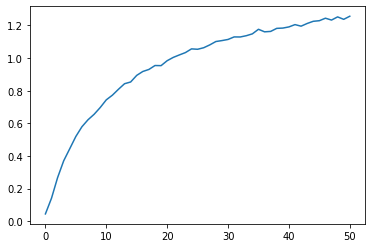

In [7]:
plt.plot(error[error != 0])
plt.savefig("loss_as_func_of_color_preturb")

In [6]:
im_preturbed[0][0].dtype

dtype('uint8')

In [7]:
outputs = []
def hook(module, input, output):
    outputs.append(output.detach().numpy().tolist())

model.layer4[-1].register_forward_hook(hook)

for img_idx in range(24):
    for ptb_idx in range(41):
        img = Image.fromarray(np.uint8(im_preturbed[img_idx][ptb_idx]))
        img = transforms.ToTensor()(img.convert("RGB")).unsqueeze(0)
        #print(img.size())
        feat = model(img.float())
    with open("./" + str(img_idx), "wb") as f:
        pickle.dump(outputs, f)
    outputs.clear()
    #break